<a href="https://colab.research.google.com/github/asheta66/CNN-WorkOut/blob/main/OSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First we need to import all the requirement packages!

Also, I put the relevent package in each box to let you know where you need them, but overally you do not need to import them two time. It is better to import them at the first box. 

In [ ]:
#matplotlib inline
import copy
import warnings
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import percentileofscore
import glob
import os
import seaborn as sns 
from pandas import DataFrame
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline



from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from sklearn import preprocessing
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Step1: Read the input data 
If the input data is '.csv' file we should use a package called as pandas. 
which we imported in previous box by "import pandas as pd" 

In [ ]:
# specifying the name for the files:
csv_file_dir = './OSA_data_set/'
Data_name = ['revised-data.csv', 'revised-data-caucasion.csv', 'revised-data-females.csv', 'revised-data-gt50.csv', 
            'revised-data-hispanic.csv', 'revised-data-lte50.csv', 'revised-data-males.csv']
# reading the training dataset: 
dataset = pd.read_csv(csv_file_dir + Data_name[0])

print("The size of original data: ", dataset.shape)
dataset

The size of original data:  (274, 32)


,Race,Age,Sex,BMI,Epworth,Wast,Hip,RDI,Neck,M.Friedman,...,Apnea Index,Hypopnea Index,Berlin Q,Arousal index,Awakening Index,PLM Index,Mins.SaO2,Mins.SaO2Desats,Lowest Sa02,class
0,1,28,1,4,8,65.00,57.00,20.0,20.00,4,...,4.6,15.4,2,16.8,1.1,4.5,14.7,1.4,81.0,1
1,2,26,0,3,3,36.00,38.00,0.1,14.50,2,...,0.0,0.1,2,32.2,2.3,4.0,0.0,0.0,93.0,0
2,2,41,1,4,8,40.75,41.75,0.9,17.75,2,...,0.0,0.9,2,19.8,3.1,12.5,0.0,0.0,90.0,0
3,1,45,1,4,18,48.00,45.00,10.2,18.00,2,...,0.0,10.2,2,14.8,1.5,2.2,24.6,8.6,80.3,1
4,2,64,0,4,8,60.00,184.00,0.7,14.25,1,...,0.6,0.2,2,37.5,5.3,55.0,5.3,0.3,83.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,59,1,3,2,38.00,40.00,5.6,16.50,2,...,0.5,5.1,2,6.4,3.2,0.0,0.4,0.0,88.0,1
270,1,56,1,4,9,46.50,45.50,32.3,19.50,3,...,2.7,29.7,2,35.7,4.3,0.0,14.7,4.8,75.0,1
271,2,27,1,4,4,49.00,44.00,20.3,17.00,4,...,5.4,14.8,2,37.6,6.0,0.0,5.8,0.0,86.0,1
272,2,40,0,4,15,50.00,57.00,37.9,17.00,3,...,4.9,33.0,2,30.4,3.6,4.4,22.9,2.2,81.0,0


### you can find the summary of input data by using follwng box: mean, std, min, max etc for each input variable: 

In [ ]:
dataset.describe()

,Race,Age,Sex,BMI,Epworth,Wast,Hip,RDI,Neck,M.Friedman,...,Apnea Index,Hypopnea Index,Berlin Q,Arousal index,Awakening Index,PLM Index,Mins.SaO2,Mins.SaO2Desats,Lowest Sa02,class
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,1.448905,53.912409,0.569343,3.547445,10.306569,42.696565,44.784483,17.619343,16.293613,2.598540,...,8.170440,9.319708,1.864964,33.384307,2.892336,17.554197,22.972007,9.100365,81.857664,0.456204
std,0.498293,14.866919,0.496074,0.689756,5.605547,7.199824,11.345949,20.807977,1.998013,1.048004,...,15.383789,11.216996,0.342388,21.403743,1.988643,28.013497,45.102124,24.312124,10.768481,0.498990
min,1.000000,19.000000,0.000000,1.000000,0.000000,25.000000,26.000000,0.000000,11.000000,1.000000,...,0.000000,0.000000,1.000000,3.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,43.000000,0.000000,3.000000,6.000000,38.000000,39.250000,2.600000,15.000000,2.000000,...,0.100000,1.425000,2.000000,17.850000,1.800000,0.600000,0.400000,0.000000,77.175000,0.000000
50%,1.000000,55.000000,1.000000,4.000000,10.000000,42.000000,44.000000,7.750000,16.000000,3.000000,...,1.600000,5.050000,2.000000,27.950000,2.600000,4.200000,4.900000,0.200000,84.000000,0.000000
75%,2.000000,65.000000,1.000000,4.000000,14.000000,47.000000,48.000000,24.950000,17.500000,3.750000,...,8.267610,13.475000,2.000000,43.375000,3.500000,23.275000,26.875000,3.975000,89.000000,1.000000
max,2.000000,96.000000,1.000000,4.000000,24.000000,70.000000,184.000000,91.400000,23.000000,4.000000,...,79.200000,56.400000,2.000000,112.700000,24.000000,146.700000,418.300000,187.300000,97.800000,1.000000


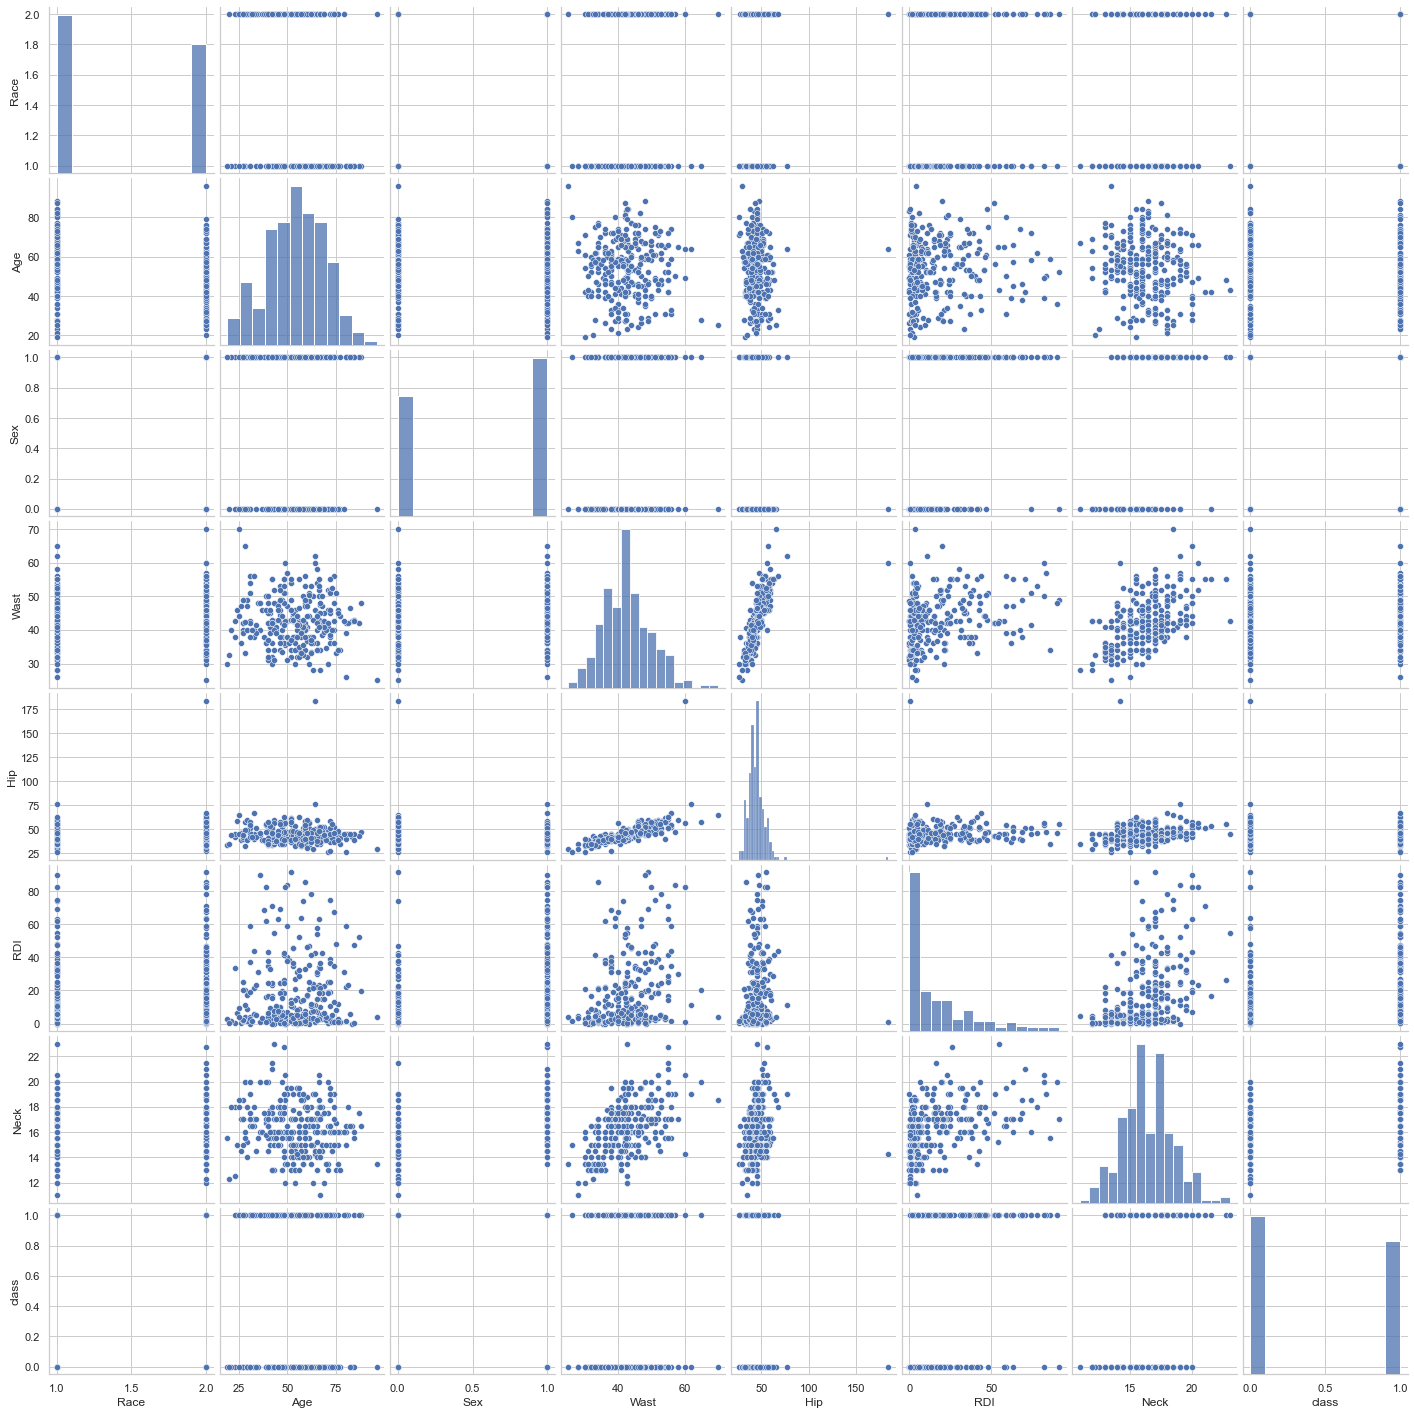

In [ ]:
# there is an option to plot correlation between inputs and targets. you can select if the input numebrs are too much for one plot. 

new_df = dataset[['Race', 'Age', 'Sex', 'Wast', 'Hip', 'RDI', 'Neck', 'class']]
sns.pairplot(new_df)

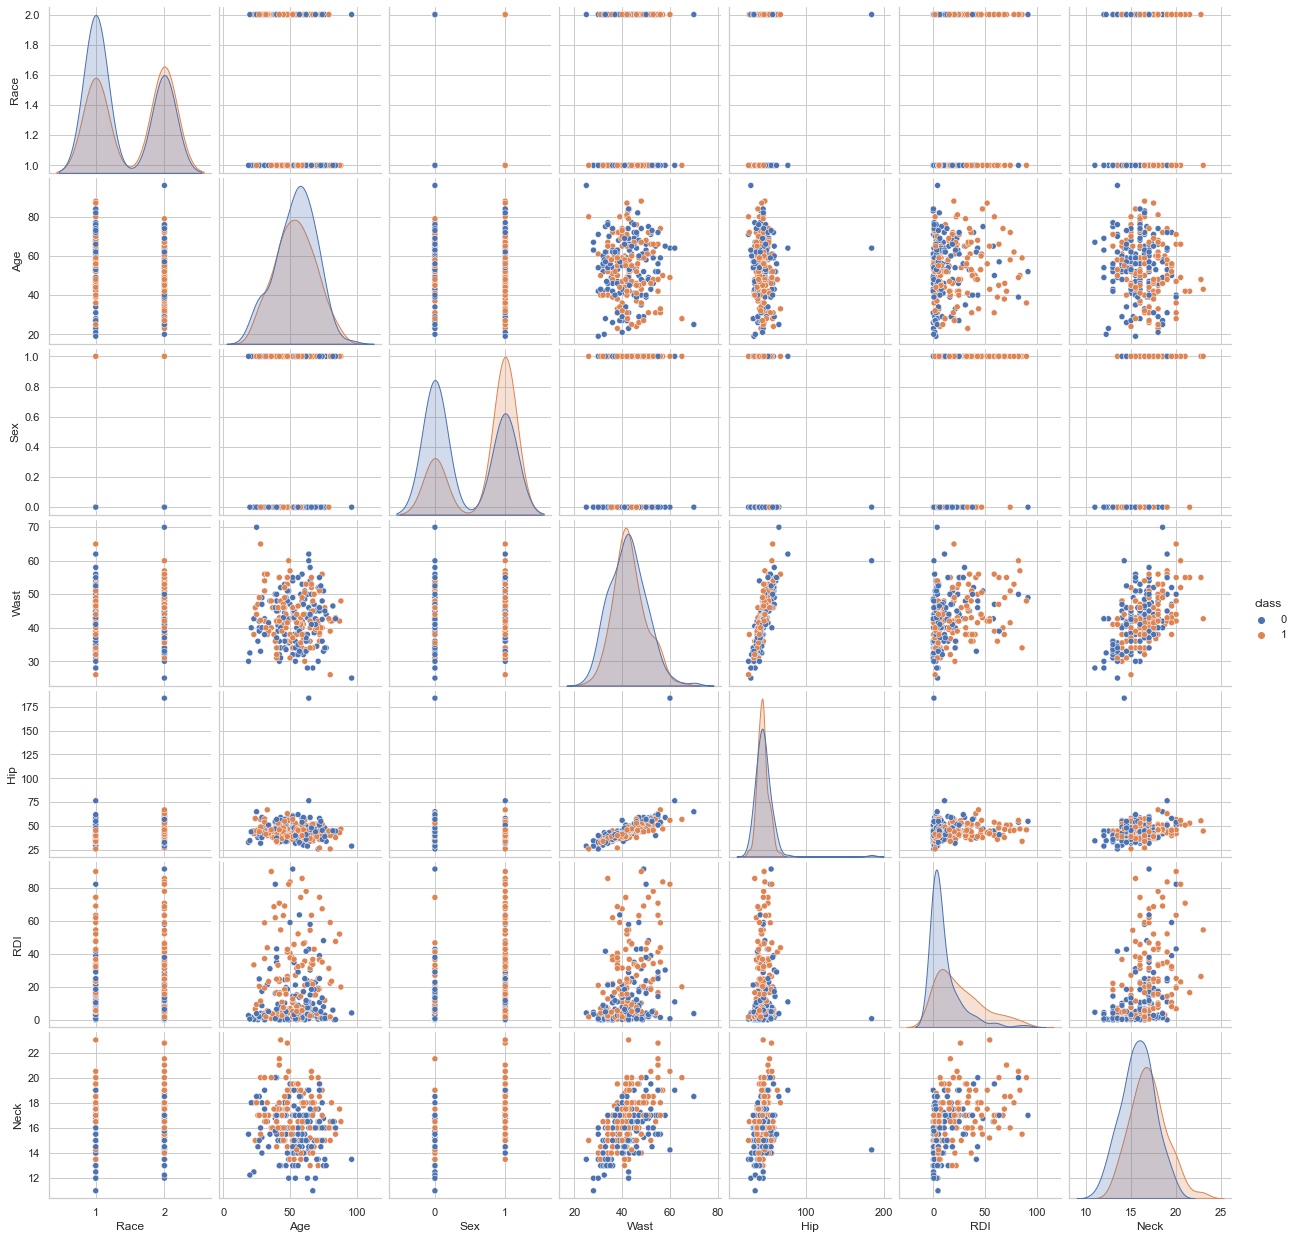

In [ ]:
# Also, you can see the correlation based on different class in this case: 
sns.pairplot(new_df, hue="class")

In [ ]:
# separating the input and targe:
X = pd.DataFrame(dataset.iloc[:,0:31])
y = pd.DataFrame(dataset['class']) 

# print the data or dataframe shape and size: 
print("The size of input data:", X.shape)
print("The size of target data:", y.shape)

Feature_names  = list(X.columns) 

The size of input data: (274, 31)
The size of target data: (274, 1)


In [ ]:
X

,Race,Age,Sex,BMI,Epworth,Wast,Hip,RDI,Neck,M.Friedman,...,Supine AHI,Apnea Index,Hypopnea Index,Berlin Q,Arousal index,Awakening Index,PLM Index,Mins.SaO2,Mins.SaO2Desats,Lowest Sa02
0,1,28,1,4,8,65.00,57.00,20.0,20.00,4,...,18.8,4.6,15.4,2,16.8,1.1,4.5,14.7,1.4,81.0
1,2,26,0,3,3,36.00,38.00,0.1,14.50,2,...,0.0,0.0,0.1,2,32.2,2.3,4.0,0.0,0.0,93.0
2,2,41,1,4,8,40.75,41.75,0.9,17.75,2,...,0.0,0.0,0.9,2,19.8,3.1,12.5,0.0,0.0,90.0
3,1,45,1,4,18,48.00,45.00,10.2,18.00,2,...,38.3,0.0,10.2,2,14.8,1.5,2.2,24.6,8.6,80.3
4,2,64,0,4,8,60.00,184.00,0.7,14.25,1,...,0.7,0.6,0.2,2,37.5,5.3,55.0,5.3,0.3,83.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,59,1,3,2,38.00,40.00,5.6,16.50,2,...,5.6,0.5,5.1,2,6.4,3.2,0.0,0.4,0.0,88.0
270,1,56,1,4,9,46.50,45.50,32.3,19.50,3,...,50.6,2.7,29.7,2,35.7,4.3,0.0,14.7,4.8,75.0
271,2,27,1,4,4,49.00,44.00,20.3,17.00,4,...,31.3,5.4,14.8,2,37.6,6.0,0.0,5.8,0.0,86.0
272,2,40,0,4,15,50.00,57.00,37.9,17.00,3,...,53.4,4.9,33.0,2,30.4,3.6,4.4,22.9,2.2,81.0


## Step2:  Splitting data into train and test 
we can do one more step to divide train into train/validation also  

In [ ]:
# test_size: is the percent of dataset we pick for test randmly and 
# shuffling would help for generalization based on my knowledge but you can put "False" if you do not want 

from sklearn.model_selection import train_test_split 


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42) 
print(f"trainin input size: {Xtrain.shape} and label size: {ytrain.shape}")
print(f"test input size: {Xtest.shape} and label size: {ytest.shape}")

trainin input size: (219, 31) and label size: (219, 1)
test input size: (55, 31) and label size: (55, 1)


## Step3: Normalization: 

we need to normalize the input training dataset and use the mean and std from training for test data set as well. 
There are several techniques you can find more information here: 
https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn import preprocessing

# find the scaler means std and mean from trainig data: 
scaler = preprocessing.StandardScaler().fit(Xtrain)   # MinMaxsclaer is anothe option instead of StandardScaler! 
Xtrain_scale_ = scaler.transform(Xtrain)  
Xtest_scale_  = scaler.transform(Xtest) 

print("The size of training dataset: ", Xtrain_scale_.shape, ytrain.shape)
print("The size of testing dataset: ", Xtest_scale_.shape, ytest.shape)

The size of training dataset:  (219, 31) (219, 1)
The size of testing dataset:  (55, 31) (55, 1)


# ML Models

## 1. Random Forest: 

### 1.1. Hyper-parameter tuning to find the best model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10, 12, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain_scale_, ytrain)
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [2, 3, 5, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 8, 10, 12, 14],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}
Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   54.0s finished
C:\Users\Hamid\miniconda3\envs\rs-yield-estimation\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### 1.2. Training: 

In [ ]:
RF = RandomForestClassifier(n_estimators = 20, min_samples_split = 8, min_samples_leaf = 6, 
                                            max_features = 'sqrt', max_depth = 6, bootstrap = False)

# Training the model: 
RF.fit(Xtrain_scale_, ytrain) 
# predict the value: 
ypredict_train_RF = RF.predict(Xtrain_scale_) 
ypredict_test_RF = RF.predict(Xtest_scale_)

from sklearn import metrics

f1_score_RF_train = metrics.f1_score(ytrain, ypredict_train_RF) 
f1_score_RF_test = metrics.f1_score(ytest, ypredict_test_RF) 

print('Random Forest')
print("Training F1 Score: %f" % f1_score_RF_train) 
print("Test F1 Score: %f" % f1_score_RF_test) 

Random Forest
Training F1 Score: 0.934673
Test F1 Score: 0.622222


<ipython-input-41-937c8488f983>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(Xtrain_scale_, ytrain)


### 1.3 Confusion Matrix: 

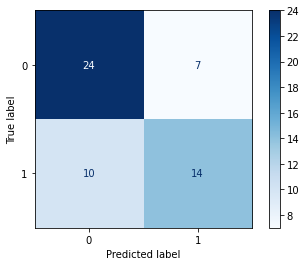

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(RF, Xtest_scale_, ytest,
                             cmap=plt.cm.Blues)
#print(disp.confusion_matrix)

### 1.4. ROC Curev and Precision-Recall Curve: 

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.57')

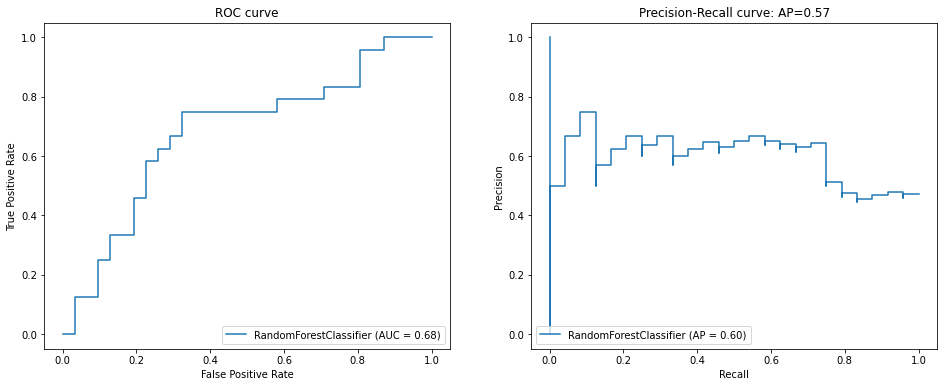

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score


average_precision = average_precision_score(ytest, ypredict_test_RF)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

roc_disp = plot_roc_curve(RF, Xtest_scale_, ytest, ax=ax1)
roc_disp.ax_.set_title('ROC curve')

pr_disp = plot_precision_recall_curve(RF, Xtest_scale_, ytest, ax=ax2)
pr_disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### 1.5. OOB Error rate: 

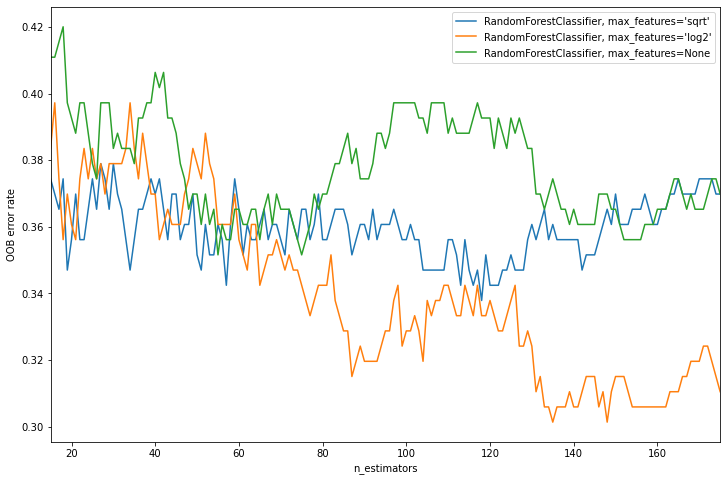

In [ ]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier


RANDOM_STATE = 123

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(Xtrain_scale_, ytrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    ax.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### 1.6. Feature importance: 

In [ ]:
importances = RF.feature_importances_
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(Feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]; 

<Figure size 1440x576 with 0 Axes>

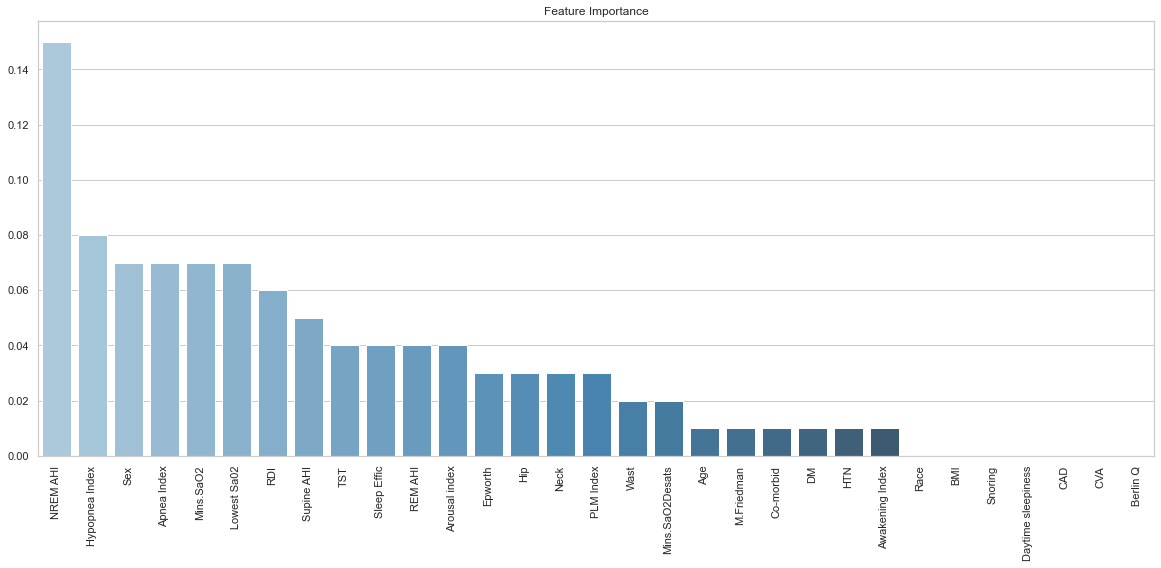

In [ ]:
feature_names = [feature_importances[i][0] for i in range(len(feature_importances))]
feature_values = [feature_importances[i][1] for i in range(len(feature_importances))]


import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(20, 8))


# Make a bar chart
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
# Make a bar chart
sns_plot = sns.barplot(x = feature_names, y = feature_values, palette="Blues_d") #
sns_plot.set_title('Feature Importance')
# Tick labels for x axis
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
None 

# Multi Layer Perceptron 

In [ ]:
from sklearn.neural_network import MLPClassifier

param_list = {"hidden_layer_sizes": [(1,), (20,) ,(50,), (100, )], 
              "activation": ["logistic", "tanh", "relu"], 
              "solver": ["sgd", "adam"], 
              "alpha": [0, 0.001,0.0005 , 0.00005]}

mlpr = MLPClassifier(max_iter=500)
MLPgridCV = GridSearchCV(estimator=mlpr, param_grid=param_list)

MLPgridCV.fit(Xtrain_scale_, ytrain)
MLPgridCV.best_params_ 

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (50,),
 'solver': 'sgd'}

In [ ]:
MLP = MLPClassifier(activation = 'relu',hidden_layer_sizes = (50,), solver = 'adam', alpha = 0.001, max_iter = 5000)
MLP.fit(Xtrain_scale_, ytrain) 

ypredict_train_MLP = MLP.predict(Xtrain_scale_) 
ypredict_test_MLP = MLP.predict(Xtest_scale_)  

f1_score_MLP_train = metrics.f1_score(ytrain, ypredict_train_RF) 
f1_score_MLP_test = metrics.f1_score(ytest, ypredict_test_RF) 

print('MLP')
print("Training F1 Score: %f" % f1_score_MLP_train) 
print("Test F1 Score: %f" % f1_score_MLP_test) 


MLP
Training F1 Score: 0.934673
Test F1 Score: 0.622222


[[15 16]
 [10 14]]


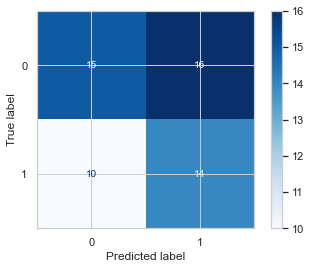

In [ ]:
disp = plot_confusion_matrix(MLP, Xtest_scale_, ytest,
                             cmap=plt.cm.Blues)
print(disp.confusion_matrix)

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.45')

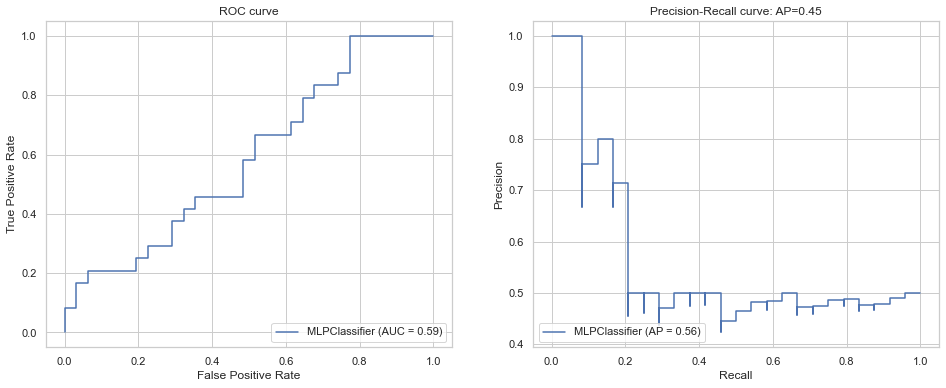

In [ ]:
average_precision = average_precision_score(ytest, ypredict_test_MLP)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

roc_disp = plot_roc_curve(MLP, Xtest_scale_, ytest, ax=ax1)
roc_disp.ax_.set_title('ROC curve')

pr_disp = plot_precision_recall_curve(MLP, Xtest_scale_, ytest, ax=ax2)
pr_disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# SVM

In [ ]:
SVM = SVC(C = 10, kernel='rbf') #  Kernel: 'rbf', 'poly', 'sigmoid', 'linear'
SVM.fit(Xtrain_scale_, ytrain) 
ypredict_train_SVM = SVM.predict(Xtrain_scale_) 
ypredict_test_SVM = SVM.predict(Xtest_scale_)  

f1_score_SVM_train = metrics.f1_score(ytrain, ypredict_train_RF) 
f1_score_SVM_test = metrics.f1_score(ytest, ypredict_test_RF) 

print('SVM')
print("Training F1 Score: %f" % f1_score_SVM_train) 
print("Test F1 Score: %f" % f1_score_SVM_test) 

SVM
Training F1 Score: 0.934673
Test F1 Score: 0.622222


[[21 10]
 [ 8 16]]


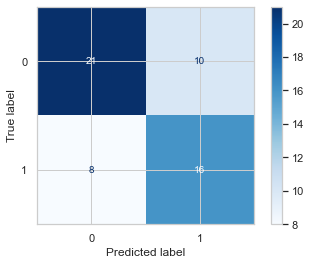

In [ ]:
disp = plot_confusion_matrix(SVM, Xtest_scale_, ytest,
                             cmap=plt.cm.Blues)
print(disp.confusion_matrix)

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.56')

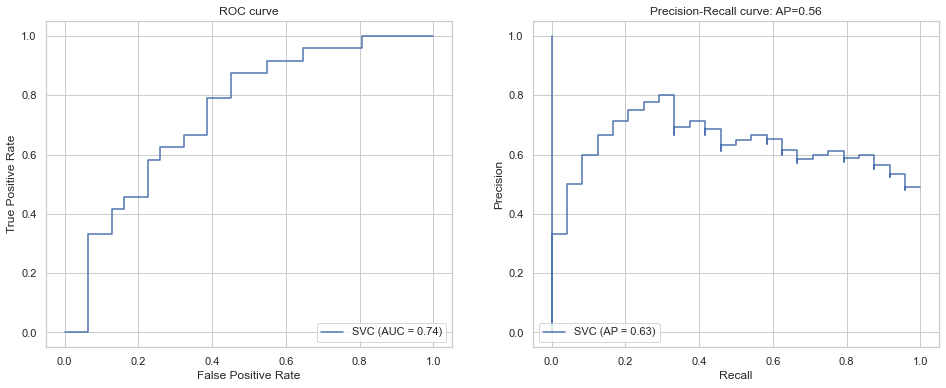

In [ ]:
average_precision = average_precision_score(ytest, ypredict_test_SVM)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

roc_disp = plot_roc_curve(SVM, Xtest_scale_, ytest, ax=ax1)
roc_disp.ax_.set_title('ROC curve')

pr_disp = plot_precision_recall_curve(SVM, Xtest_scale_, ytest, ax=ax2)
pr_disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))